In [ ]:
# KDAR NuWro Generator Kinet Energy Distributions 

In [56]:
import sys
import math
import uproot
import numpy as np
import matplotlib.pyplot as plt

m_prot = 938.272
m_mu = 105.6584

In [57]:
def get_energies(file_name, cap_bool):
    
    # Get the proton and muon kinetic energies 
    # If cap_bool is set to True then only get 2 particle topologies 

    data = uproot.open(file_name).get('treeout')
    postpdg = np.array(data["post.pdg"].array())
    E = np.array(data["post.t"].array())
    cc_bool = data['flag.cc'].array()

    i = 0
    protE, muE, n_prot = [], [], []
    # Event Loop
    while i < len(postpdg):   
        # len(postpdg) is the number of events
        # len(postpdg[i]) is the number of particles exiting the nucleus in an event

        if cap_bool == True: 
            condition = (len(postpdg[i]) == 2)
        else: 
            condition = (len(postpdg[i]) > 0)
            
        # Enforce (or do not enforce) a 2 particle cap and make sure to grab only the CC channels
        if ( condition and (cc_bool[i] == True) ):

            # Get the kinetic energies of the protons (summed) and muons
            j, prot_E, proton_count = 0, 0, 0 #Initializers
            while j < len(postpdg[i]): 
                energy = E[i][j]
                if postpdg[i][j] == 2212: #Proton
                    proton_count += 1
                    KE = energy - m_prot 
                    prot_E += KE
                if postpdg[i][j] == 13: # Muon
                    KE = energy - m_mu
                    muE.append( KE )                            
                j += 1

            protE.append( prot_E )
            n_prot.append( proton_count )

        i += 1     

    # Change lists to arrays
    protE = np.array( protE )
    muE = np.array( muE )
    n_prot = np.array(n_prot)
    
    return protE, muE, n_prot

In [58]:
def plot_energies(protE, muE, n_prot, proton_bool): 
    
    # Enforce a single (multi) proton topology
    if proton_bool == True: 
        condition = (n_prot == 1)
    else: 
        condition = (n_prot > 1)
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
    axes[0].hist(protE[ condition ], bins = 50, color="b", alpha = 0.3)
    axes[0].tick_params(axis='both', which='major', labelsize = 18)
    axes[0].set_xlabel( 'Proton Kinetic Energy (MeV)', fontsize = 18 )
    axes[0].set_ylabel( 'Arbitrary Units', fontsize = 18 )

    axes[1].hist(muE[ condition ], bins = 50, color="b", alpha = 0.3)
    axes[1].tick_params(axis='both', which='major', labelsize = 18)
    axes[1].set_xlabel( 'Muon Kinetic Energy (MeV)', fontsize = 18 )
    fig.tight_layout()
    plt.setp(axes, yticks=[])
    plt.show()

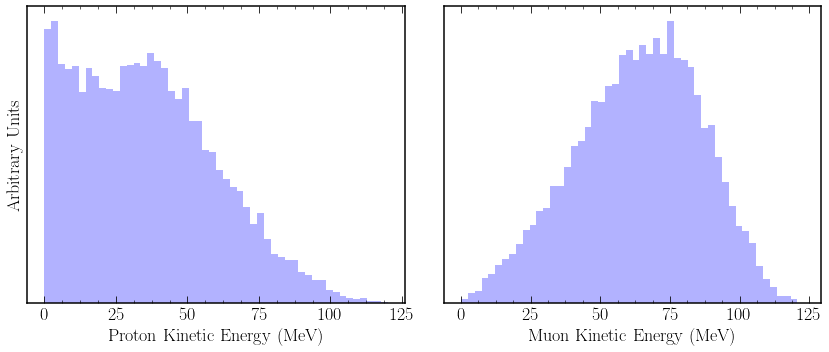

In [59]:
file_name = 'all_channels.root' # Your file here

# No total particle cap, single proton events
protE, muE, n_prot = get_energies(file_name, False)
plot_energies( protE, muE, n_prot, True)

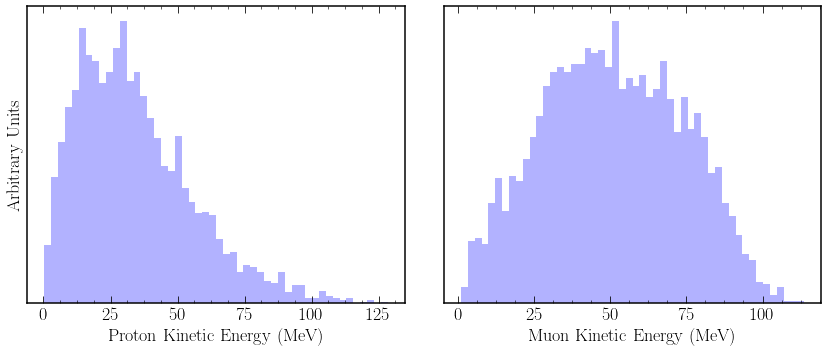

In [60]:
# No total particle cap, multi-proton events
plot_energies( protE, muE, n_prot, False)

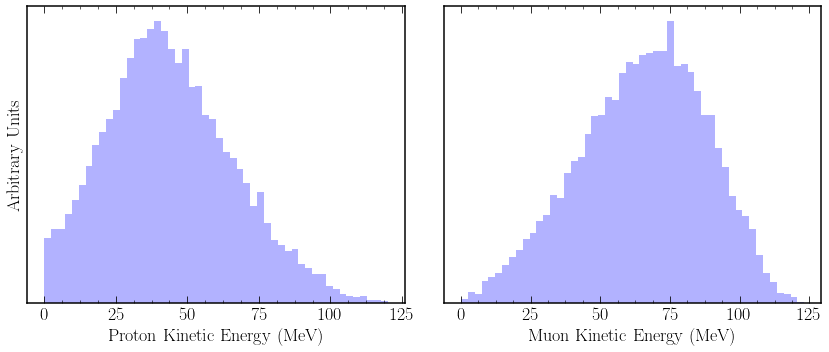

In [61]:
# Now, enforce a 2 particle cap (1 proton, 1 muon)
protE, muE, n_prot = get_energies(file_name, True)
plot_energies( protE, muE, n_prot, True)